<a href="https://colab.research.google.com/github/elizabethts/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def mean_var_std(list):
  mean = sum(list)/len(list)
  variance = sum([(mean-i)**2 for i in list])/len(list)
  std = (sum([(mean - i)**2 for i in list])/len(list))**0.5
  
  return mean, variance, std

mean, variance, std = mean_var_std(sales)
print('The mean is:', mean)
print('The variance is:', variance)
print('The standard deviation is:', std)

#numpy check
print('\nThe mean is'           , np.mean(sales))
print('The variance is'          , np.var(sales))
print('The standard deviation is', np.std(sales))

  

The mean is: 3052.714285714286
The variance is: 183761.06122448976
The standard deviation is: 428.67360686714756

The mean is 3052.714285714286
The variance is 183761.06122448976
The standard deviation is 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [36]:
customers = [127, 80, 105, 92, 120, 115, 93]
covariance = np.cov(sales, customers, ddof=0)[0][1]

print('The covariance is ', covariance)

#covariance calculation
def covariance(a,b):
    return sum([ ((i-np.mean(a)) * (j-np.mean(b))) for i,j in zip(a,b)])/len(a)
  
print(covariance(sales,customers))
  

The covariance is  6518.020408163265
6518.020408163265


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [54]:
mean_cust, var_cust, std_cust = mean_var_std(customers)
mean_sales, variance_sales, std_sales = mean_var_std(sales)


print('The standard deviation of customers is:',std_cust)

def corr_coef_r(a,b):
  mean_a, variance_a, std_a = mean_var_std(a)
  mean_b, variance_b, std_b = mean_var_std(b)
  r = covariance(a,b)/(std_a * std_b)
  return r

print('The correlation coefficient is:',corr_coef_r(sales,customers))

#check with numpy
print('\n',np.corrcoef(sales,customers))


The standard deviation of customers is: 15.792015549069118
The correlation coefficient is: 0.9628339778148909

 [[1.         0.96283398]
 [0.96283398 1.        ]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [62]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

df = pd.read_csv(url)
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [66]:
df_numeric = df[['pclass', 'survived', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'boat', 'body' , 'has_cabin_number']]
df_numeric.head()

,pclass,survived,age,sibsp,parch,ticket,fare,boat,body,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,24160,211.3375,2,NaN,1
1,1.0,1.0,0.9167,1.0,2.0,113781,151.5500,11,NaN,1
2,1.0,0.0,2.0000,1.0,2.0,113781,151.5500,NaN,NaN,1
3,1.0,0.0,30.0000,1.0,2.0,113781,151.5500,NaN,135.0,1
4,1.0,0.0,25.0000,1.0,2.0,113781,151.5500,NaN,NaN,1


In [71]:
df_numeric.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [72]:
df_numeric.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

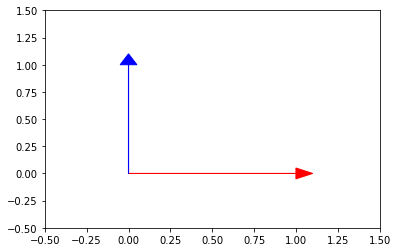

A synonym for orthogonal is perpendicular


In [82]:
a = [1,0]
b = [0,1]

plt.arrow(0,0, a[0],a[1], head_width = 0.1, head_length = 0.1, color = 'red')
plt.arrow(0,0, b[0],b[1], head_width = 0.1, head_length = 0.1, color = 'blue')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

print('A synonym for orthogonal is perpendicular')

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [110]:
a = np.array([[-5], [3], [7]])
b = np.array([[6], [-8], [2]])

a2 = np.array([-5, 3, 7])
b2 = np.array([6, -8, 2])

np.dot(a2,b2)
#np.dot(a,b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [107]:
c = np.array([2, -15, 6, 20]) 


c_norm_squared = (np.linalg.norm(c))**2
c_c = np.dot(c,c)
c_T_c = (c.T)*c

print('The norm squared is:', c_norm_squared)
print('c dot c is:', c_c)
print('c_transpose*c is:', c_T_c)

The norm squared is: 665.0
c dot c is: 665
c_transpose*c is: [  4 225  36 400]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

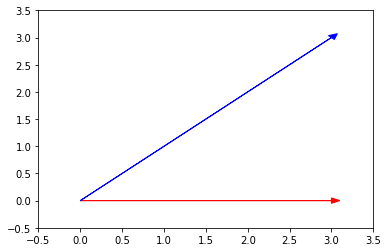

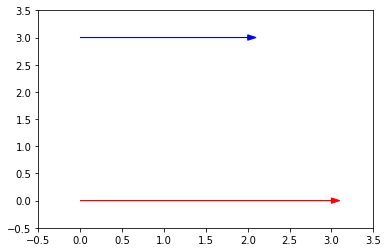

In [133]:
a = [3,0]
b = [3,3]
c = [3,0]
d = [2,0]

f1 = plt.figure(1)
plt.arrow(0,0, a[0],a[1], head_width = 0.1, head_length = 0.1, color = 'red')
plt.arrow(0,0, b[0],b[1], head_width = 0.1, head_length = 0.1, color = 'blue')
plt.xlim(-0.5, 3.5)
plt.ylim(-0.5, 3.5)

f2 = plt.figure(2)
plt.arrow(0,0, c[0],c[1], head_width = 0.1, head_length = 0.1, color = 'red')
plt.arrow(0,3, d[0],d[1], head_width = 0.1, head_length = 0.1, color = 'blue')
plt.xlim(-0.5, 3.5)
plt.ylim(-0.5, 3.5)
plt.show()



# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [116]:
g = [1, 2]
h = [4, 8] 
gh_matrix = np.matrix([g,h])
#print(gh_matrix)

np.linalg.matrix_rank(gh_matrix)
print('The span is 1D space')


The span is 1D space


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [118]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]

lmn_matrix = np.matrix([l,m,n])
np.linalg.matrix_rank(lmn_matrix)

print('l, m, n spans 3D space')

The span of l, m, n is 3D space


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



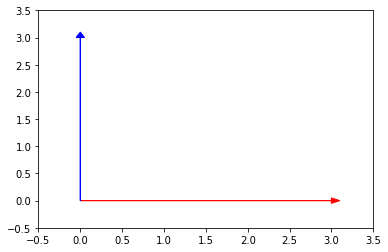

In [136]:
a = [3,0]
b = [0,3]


f1 = plt.figure(1)
plt.arrow(0,0, a[0],a[1], head_width = 0.1, head_length = 0.1, color = 'red')
plt.arrow(0,0, b[0],b[1], head_width = 0.1, head_length = 0.1, color = 'blue')
plt.xlim(-0.5, 3.5)
plt.ylim(-0.5, 3.5)
plt.show()

## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

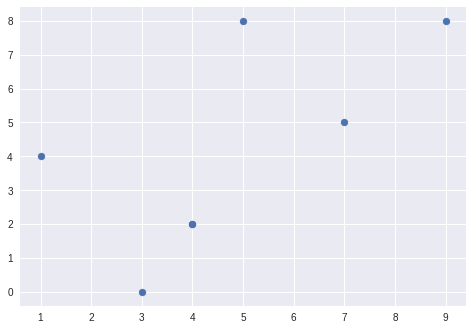

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()